In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Import Data
vdata = pd.read_csv('Videos_data.csv')
vdata = vdata.iloc[:, 1:]     # Remove extra un-named column
vdata.head(10)
print(vdata.shape)

(10333, 4)


In [ ]:
num_missing_desc = vdata.isnull().sum()[0]    # No. of values with msising descriptions
print('Number of missing values: ' + str(num_missing_desc))
vdata = vdata.dropna()

Number of missing values: 0


In [ ]:
# Missing Values
num_missing_desc = vdata.isnull().sum()[1]    # No. of values with msising descriptions
print('Number of missing values: ' + str(num_missing_desc))
vdata = vdata.dropna()

Number of missing values: 0


In [ ]:
# Here In Dataset Some VideoId Contain Explicitly Null Value
# We Need To Delete Them

In [ ]:
vdata = vdata[vdata['Video Id'] != '#NAME?']
vdata = vdata.reset_index(drop=True)
print(vdata.shape)

(9879, 4)


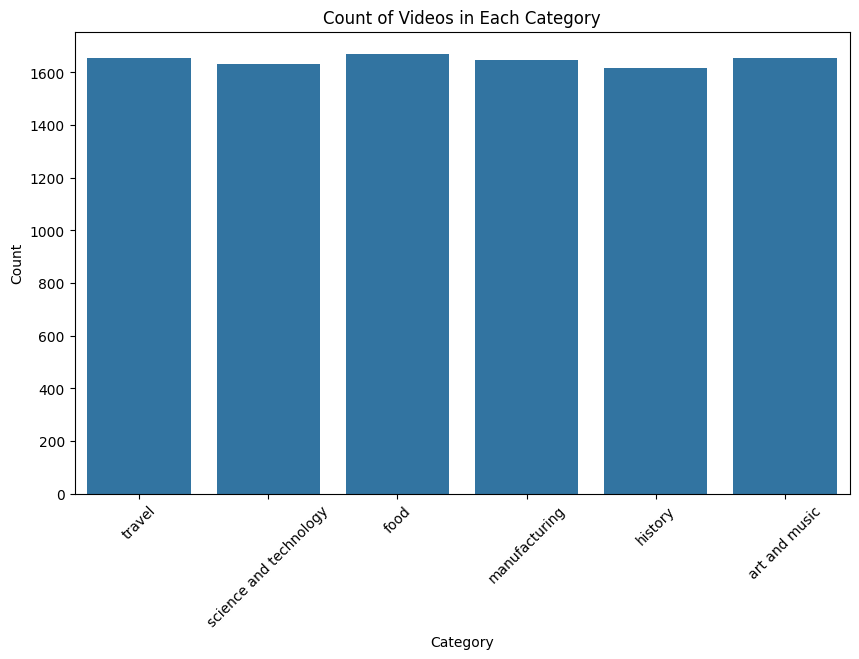

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=vdata)
plt.title('Count of Videos in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

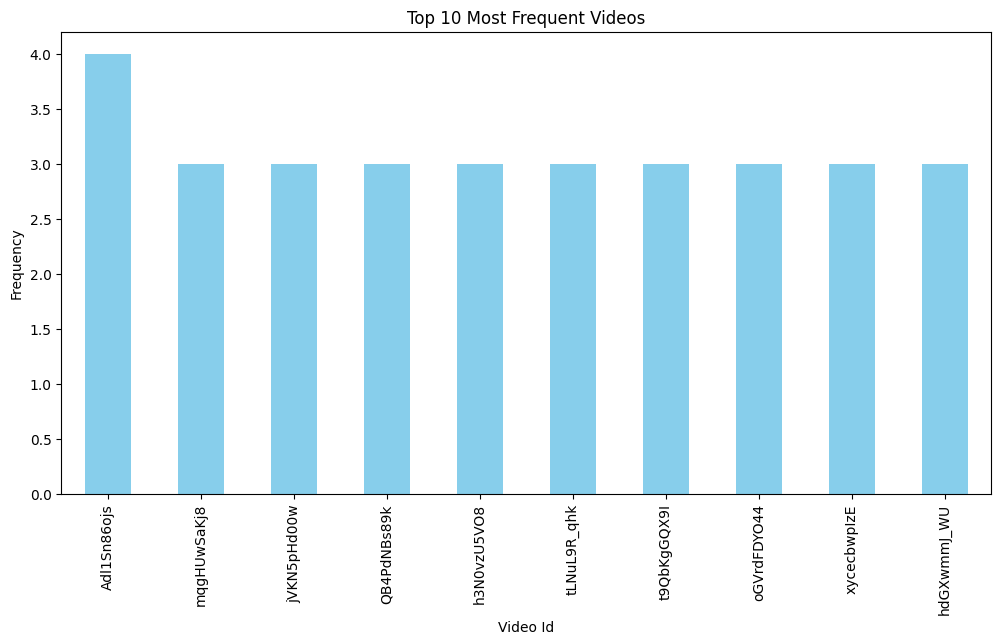

In [ ]:
top_videos = vdata['Video Id'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_videos.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Videos')
plt.xlabel('Video Id')
plt.ylabel('Frequency')
plt.show()

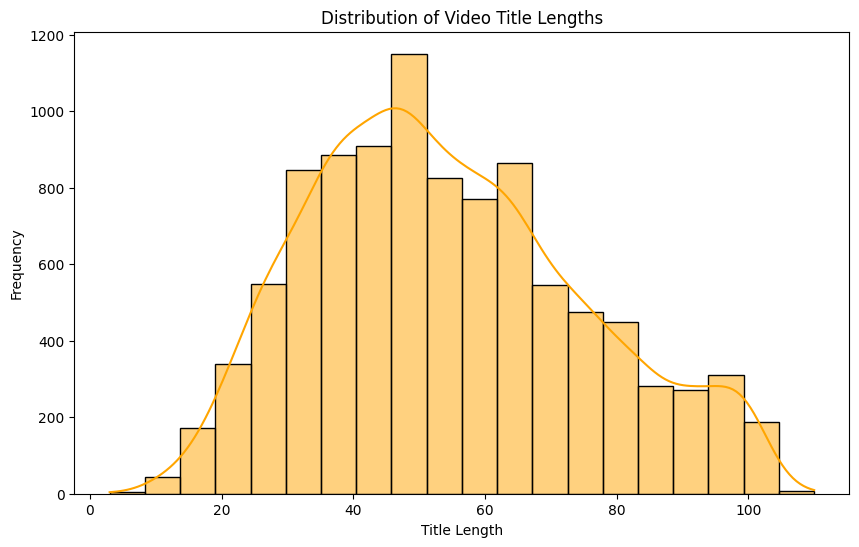

In [ ]:
vdata['Title_Length'] = vdata['Title'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(vdata['Title_Length'], bins=20, kde=True, color='orange')
plt.title('Distribution of Video Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()


**Text Cleaning**

The cleaning of the text is performed in the following manner:

* Converting to Lowercase
* Removing numerical values, because they do not contribute towards predicting the category
* Removing Punctuation because special characters like $, !, etc. do not hold any useful information
* Removing extra white spaces
* Tokenizing into words - This means to convert a text string into a list of 'tokens', where each token is a word. Eg. The sentence 'Hello How Are You' becomes ['Hello', 'How', 'Are', 'You']
* Removing all non-alphabetic words
* Filtering out stop words such as and, the, is, etc. because they do not contain useful information for text classification
* Lemmatizing words - Lemmatizing reduces words to their base meaning, such as words 'fly' and 'flying' are both convert to just 'fly'



In [ ]:
vdata['Title'] = vdata['Title'].map(lambda x: x.lower())
vdata['Description'] = vdata['Description'].map(lambda x: x.lower())

#Remove numbers
vdata['Title'] = vdata['Title'].map(lambda x: re.sub(r'\d+', '', x))
vdata['Description'] = vdata['Description'].map(lambda x: re.sub(r'\d+', '', x))

# Remove Punctuation
vdata['Title']  = vdata['Title'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
vdata['Description']  = vdata['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
vdata['Title'] = vdata['Title'].map(lambda x: x.strip())
vdata['Description'] = vdata['Description'].map(lambda x: x.strip())

# Tokenize into words
vdata['Title'] = vdata['Title'].map(lambda x: word_tokenize(x))
vdata['Description'] = vdata['Description'].map(lambda x: word_tokenize(x))

# Remove non alphabetic tokens
vdata['Title'] = vdata['Title'].map(lambda x: [word for word in x if word.isalpha()])
vdata['Description'] = vdata['Description'].map(lambda x: [word for word in x if word.isalpha()])

# filter out stop words
stop_words = set(stopwords.words('english'))
vdata['Title'] = vdata['Title'].map(lambda x: [w for w in x if not w in stop_words])
vdata['Description'] = vdata['Description'].map(lambda x: [w for w in x if not w in stop_words])

# Word Lemmatization
lem = WordNetLemmatizer()
vdata['Title'] = vdata['Title'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
vdata['Description'] = vdata['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

# Turn lists back to string
vdata['Title'] = vdata['Title'].map(lambda x: ' '.join(x))
vdata['Description'] = vdata['Description'].map(lambda x: ' '.join(x))

In [ ]:
vdata.head(10)

,Video Id,Title,Description,Category,Title_Length
0,ehmsJLZlCZ0,ep travel north east india arunachal journey b...,journey arunachal north east india begin train...,travel,92
1,e2NQE41J5eM,travel much earn money,subscribe httpsgoogldetsmj mountaintrekker gim...,travel,47
2,i9E_Blai8vk,travel vlog welcome bali priscilla lee,chance fly bali whole family thanksgiving firs...,travel,45
3,7ByoBJYXU0k,step become travel blogger,travel blogger nikki vargas pin map project vo...,travel,36
4,yvn79Rv0F48,backpack meghalaya northeast india trip sohra ...,video explore north east india start guwahati ...,travel,93
5,SL_YBLWdZb8,welcome peru best essential tip amp travel guide,welcome peru essential travel guide show best ...,travel,57
6,kiNyRY5s7n8,start travel blog travel blogging fulltime,create travel blog website httpbitlyltstarttra...,travel,59
7,kY41XgTEEQU,day ksrtc bus fan aanavandi travel blog meet k...,ksrtc,travel,66
8,7mIzRYh8jGA,like travel pakistan,subscribe httpsgooglzxzgk watch full series ht...,travel,38
9,YsnLGEQea4s,best city visit europe lisbon portugal travel ...,lisbon quickly become one favourite cities wor...,travel,64


Data Encoding
Data PreProcessing

In [ ]:
# Encode classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(vdata.Category)
vdata.Category = le.transform(vdata.Category)
vdata.head(10)


,Video Id,Title,Description,Category,Title_Length
0,ehmsJLZlCZ0,ep travel north east india arunachal journey b...,journey arunachal north east india begin train...,5,92
1,e2NQE41J5eM,travel much earn money,subscribe httpsgoogldetsmj mountaintrekker gim...,5,47
2,i9E_Blai8vk,travel vlog welcome bali priscilla lee,chance fly bali whole family thanksgiving firs...,5,45
3,7ByoBJYXU0k,step become travel blogger,travel blogger nikki vargas pin map project vo...,5,36
4,yvn79Rv0F48,backpack meghalaya northeast india trip sohra ...,video explore north east india start guwahati ...,5,93
5,SL_YBLWdZb8,welcome peru best essential tip amp travel guide,welcome peru essential travel guide show best ...,5,57
6,kiNyRY5s7n8,start travel blog travel blogging fulltime,create travel blog website httpbitlyltstarttra...,5,59
7,kY41XgTEEQU,day ksrtc bus fan aanavandi travel blog meet k...,ksrtc,5,66
8,7mIzRYh8jGA,like travel pakistan,subscribe httpsgooglzxzgk watch full series ht...,5,38
9,YsnLGEQea4s,best city visit europe lisbon portugal travel ...,lisbon quickly become one favourite cities wor...,5,64


from matplotlib import pyplot as plt
_df_0['Title_Length'].plot(kind='hist', bins=20, title='Title_Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Category']
  ys = series['Title_Length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Category', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Category')
_ = plt.ylabel('Title_Length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Category']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Category'}, axis=1)
              .sort_values('Category', ascending=True))
  xs = counted['Category']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Category', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Category')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['Title_Length'].plot(kind='line', figsize=(8, 4), title='Title_Length')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# TF-IDF
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_title = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = vdata.Category
features_title = tfidf_title.fit_transform(vdata.Title).toarray()
features_description = tfidf_desc.fit_transform(vdata.Description).toarray()
print('Title Features Shape: ' + str(features_title.shape))
print('Description Features Shape: ' + str(features_description.shape))

joblib.dump(tfidf_title, 'tfidf_title_vectorizer.pkl')
joblib.dump(tfidf_desc, 'tfidf_desc_vectorizer.pkl')


Title Features Shape: (9879, 2608)
Description Features Shape: (9879, 4755)


['tfidf_desc_vectorizer.pkl']

In [ ]:
# Best 5 keywords for each class using Title Feaures
from sklearn.feature_selection import chi2
import numpy as np
N = 10
for current_class in list(le.classes_):
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_title, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_title.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")


# 'art and music':
Most correlated unigrams:
------------------------------
. musical
. live
. travel
. arts
. video
. paint
. official
. music
. art
. theatre
Most correlated bigrams:
------------------------------
. art challenge
. avengers endgame
. theatre company
. theatre official
. theatre congolais
. capitol theatre
. musical theatre
. work theatre
. official music
. music video


# 'food':
Most correlated unigrams:
------------------------------
. street
. recipe
. taste
. healthy
. try
. foods
. eat
. snack
. cook
. food
Most correlated bigrams:
------------------------------
. sam cook
. cook guy
. try hiho
. eat snack
. healthy snack
. emmy eat
. snack amp
. taste test
. kid try
. street food


# 'history':
Most correlated unigrams:
------------------------------
. archaeologist
. anthropologist
. rap
. anthropological
. archaeologists
. discoveries
. archaeological
. archaeology
. history
. anthropology
Most correlated bigrams:
------------------------------
. cultural ant

In [ ]:
# Best 5 keywords for each class using Description Features
from sklearn.feature_selection import chi2
import numpy as np
N = 10
for current_class in list(le.classes_):
 current_class_id = le.transform([current_class])[0]
 features_chi2 = chi2(features_description, labels == current_class_id)
 indices = np.argsort(features_chi2[0])
 feature_names = np.array(tfidf_desc.get_feature_names_out())[indices]
 unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
 bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
 print("# '{}':".format(current_class))
 print("Most correlated unigrams:")
 print('-' *30)
 print('. {}'.format('\n. '.join(unigrams[-N:])))
 print("Most correlated bigrams:")
 print('-' *30)
 print('. {}'.format('\n. '.join(bigrams[-N:])))
 print("\n")

# 'art and music':
Most correlated unigrams:
------------------------------
. spotify
. album
. draw
. arts
. listen
. official
. paint
. music
. art
. theatre
Most correlated bigrams:
------------------------------
. music vault
. official video
. theatre passaic
. passaic nj
. live capitol
. capitol theatre
. click listen
. production connexion
. official music
. music video


# 'food':
Most correlated unigrams:
------------------------------
. delicious
. recipes
. taste
. healthy
. recipe
. foods
. eat
. snack
. cook
. food
Most correlated bigrams:
------------------------------
. update hiho
. play sign
. hiho special
. httpbitlycomhihofans update
. httpbitlyznbqjw come
. sign httpbitlycomhihofans
. special offer
. come play
. sponsor series
. street food


# 'history':
Most correlated unigrams:
------------------------------
. rap
. anthropologist
. archaeologist
. ancient
. archaeologists
. discoveries
. archaeological
. history
. archaeology
. anthropology
Most correlated bigra

# Modeling And Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, y_train, y_test = train_test_split(vdata.iloc[:, 1:3], vdata['Category'], random_state = 0)
X_train_title_features = tfidf_title.transform(X_train['Title']).toarray()
X_train_desc_features = tfidf_desc.transform(X_train['Description']).toarray()
features = np.concatenate([X_train_title_features, X_train_desc_features], axis=1)

In [ ]:
X_train.head()

,Title,Description
6249,cool print mechanisms,model incredible examples print capable favour...
3776,whole foods apologies,whole foods get lot criticism lately stephen h...
3488,street food bangkok awesome pad thai instant n...,petchaburi soi one best bangkok street food st...
6825,history england documentary,part httpswwwyoutubecomwatchvjgvnxerjdwts anal...
3814,catch cook spearfishing caribbean fish beach,join us catch cook caribbean find shipwreck lu...


In [ ]:
y_train.head()

6249    3
3776    1
3488    1
6825    2
3814    1
Name: Category, dtype: int64

In [ ]:
# Naive Bayes
nb = MultinomialNB().fit(features, y_train)
# SVM
svm = linear_model.SGDClassifier(loss='modified_huber',max_iter=1000, tol=1e-3).fit(features,y_train)
# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=40,algorithm="SAMME").fit(features,y_train)

In [ ]:
!pip install keras-utils
!pip install np_utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=94b13c35928834e6e98d227a399fa4df0452818a9ebc96cb07b4c52bd9a07f29
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras-utils
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 981.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=f33e5ed290fd42c1f7c708e405fe9b685fcb99a893519dd4780dd72cebf6f813
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100

# Combining titles and descriptions into a single sentence
titles = vdata['Title'].values
descriptions = vdata['Description'].values
data_for_lstms = []
for i in range(len(titles)):
    temp_list = [titles[i], descriptions[i]]
    data_for_lstms.append(' '.join(temp_list))

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_for_lstms)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Convert the data to padded sequences
X = tokenizer.texts_to_sequences(data_for_lstms)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

# One-hot Encode labels
Y = pd.get_dummies(vdata['Category']).values
print('Shape of label tensor:', Y.shape)

# Splitting into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)

Found 25974 unique tokens.
Shape of data tensor: (9879, 50)
Shape of label tensor: (9879, 6)


In [ ]:
# Define LSTM Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           2000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 50, 100)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 2081006 (7.94 MB)
Trainable params: 2081006 (7.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
epochs = 8
batch_size = 70
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/8
96/96 [==============================] - 53s 487ms/step - loss: 1.1529 - accuracy: 0.5850 - val_loss: 0.2160 - val_accuracy: 0.9514
Epoch 2/8
96/96 [==============================] - 48s 502ms/step - loss: 0.1488 - accuracy: 0.9640 - val_loss: 0.1366 - val_accuracy: 0.9622
Epoch 3/8
96/96 [==============================] - 30s 311ms/step - loss: 0.0645 - accuracy: 0.9880 - val_loss: 0.1537 - val_accuracy: 0.9636
Epoch 4/8
96/96 [==============================] - 22s 230ms/step - loss: 0.0455 - accuracy: 0.9912 - val_loss: 0.0933 - val_accuracy: 0.9730
Epoch 5/8
96/96 [==============================] - 25s 263ms/step - loss: 0.0237 - accuracy: 0.9955 - val_loss: 0.0904 - val_accuracy: 0.9771
Epoch 6/8
96/96 [==============================] - 17s 182ms/step - loss: 0.0148 - accuracy: 0.9967 - val_loss: 0.0977 - val_accuracy: 0.9771
Epoch 7/8
96/96 [==============================] - 25s 257ms/step - loss: 0.0143 - accuracy: 0.9973 - val_loss: 0.1008 - val_accuracy: 0.9717
Epoch 

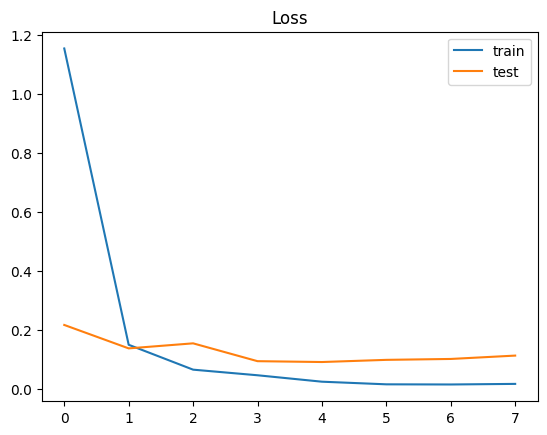

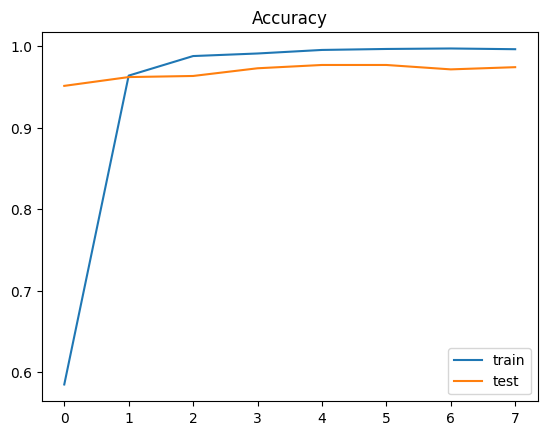

In [ ]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vdata.iloc[:, 1:3], vdata['Category'], random_state = 0)
X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)


In [ ]:
pip install scikit-plot

                        precision    recall  f1-score   support

         art and music       0.92      0.96      0.94       414
                  food       0.96      0.94      0.95       429
               history       0.97      0.91      0.94       419
         manufacturing       0.98      0.99      0.98       395
science and technology       0.94      0.95      0.94       411
                travel       0.96      0.96      0.96       402

              accuracy                           0.95      2470
             macro avg       0.95      0.95      0.95      2470
          weighted avg       0.95      0.95      0.95      2470



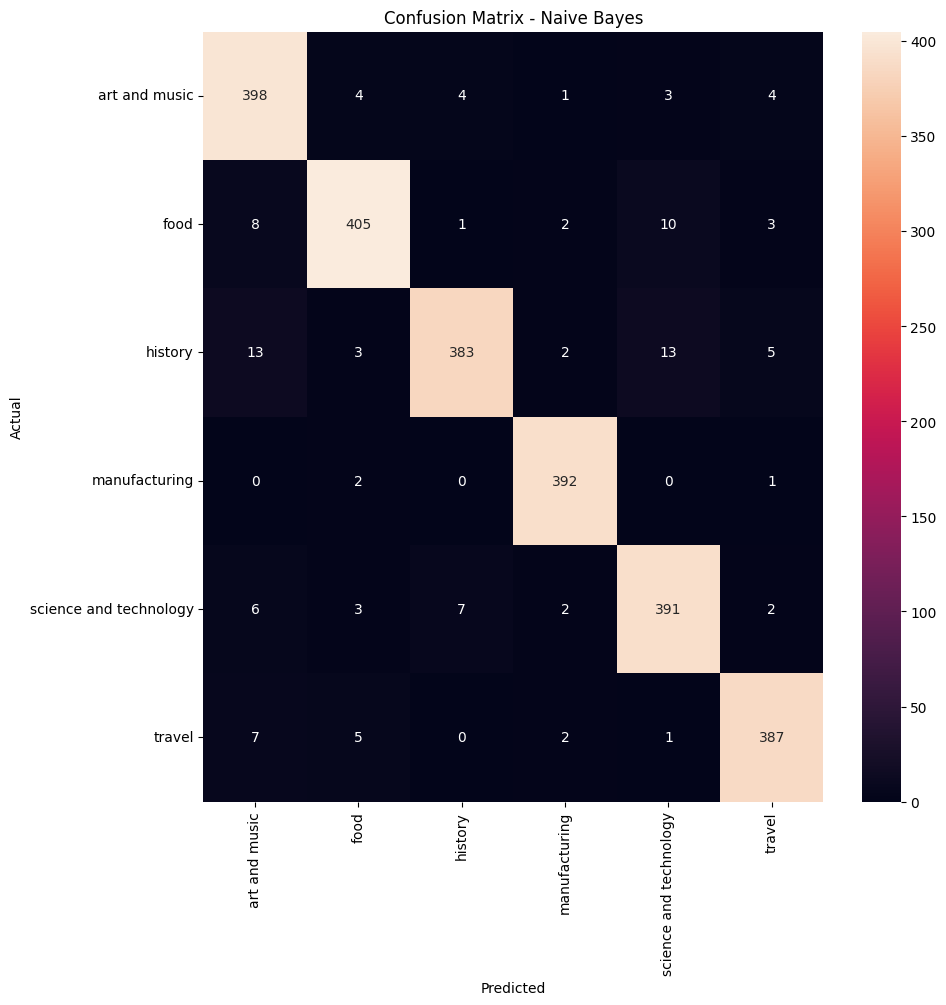

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


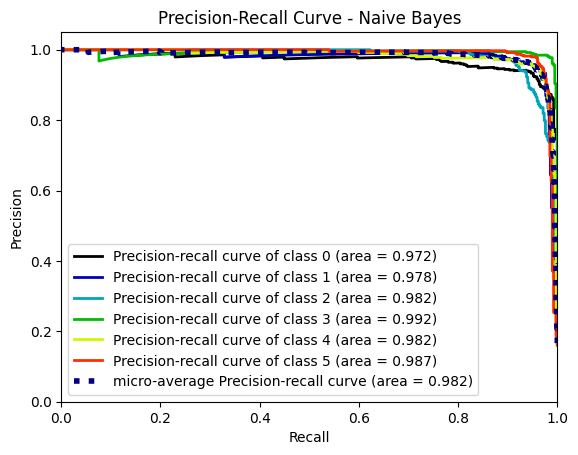

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)

# Naive Bayes
y_pred = nb.predict(test_features)
y_probas = nb.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred,
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - Naive Bayes')
plt.show()


In [ ]:
# SVM
y_pred = svm.predict(test_features)
y_probas = svm.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred,target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - SVM')
plt.show()


                        precision    recall  f1-score   support

         art and music       0.15      0.13      0.14       409
                  food       0.19      0.17      0.18       430
               history       0.18      0.32      0.23       384
         manufacturing       0.13      0.10      0.11       403
science and technology       0.16      0.12      0.14       404
                travel       0.17      0.16      0.17       440

              accuracy                           0.17      2470
             macro avg       0.16      0.17      0.16      2470
          weighted avg       0.16      0.17      0.16      2470

Accuracy of AdaBoost model: 0.17


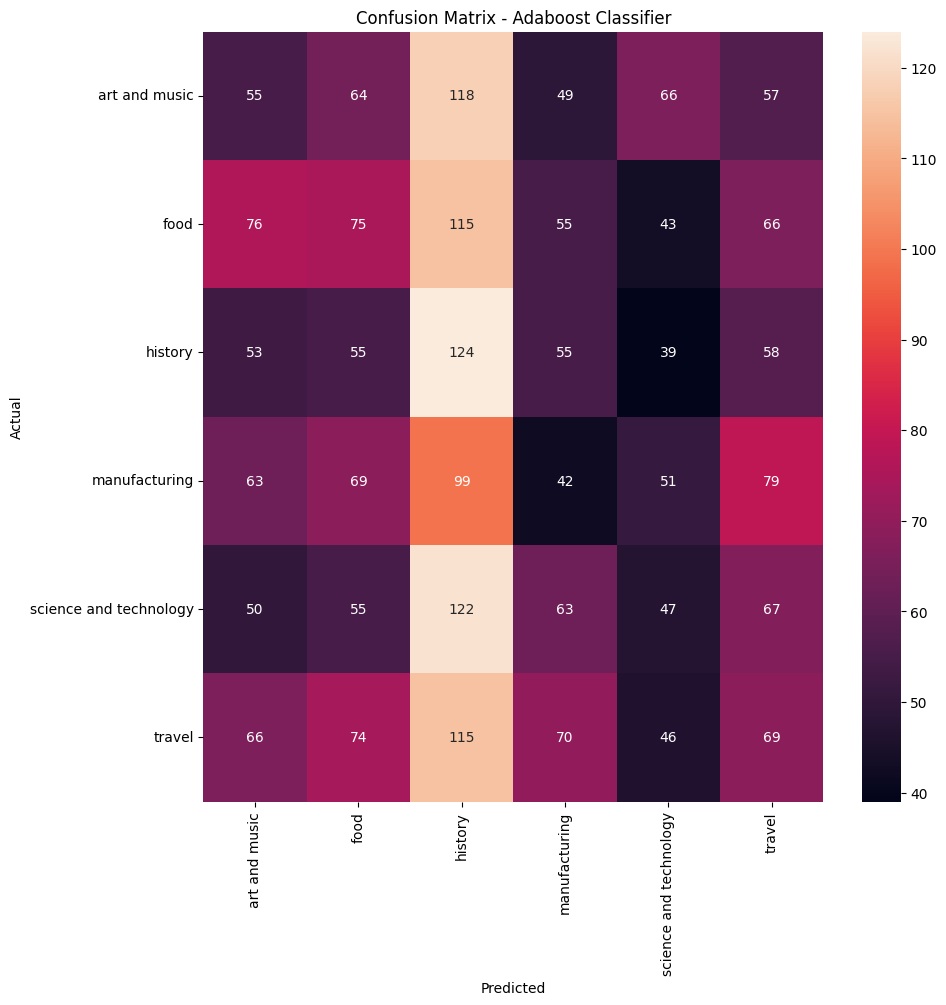

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


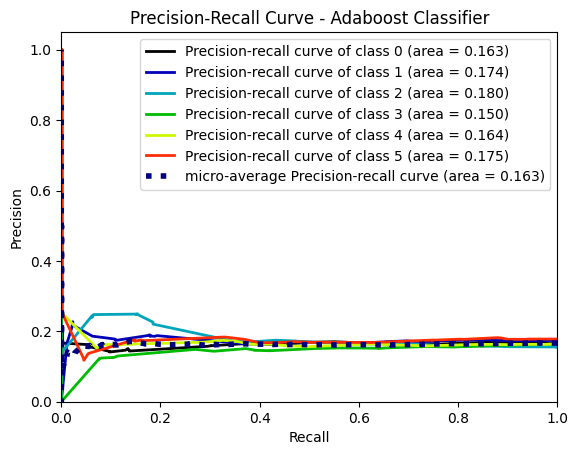

['adaboost_model.pkl']

In [ ]:
# Adaboost Classifier

y_pred = adaboost.predict(test_features)
y_probas = adaboost.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred,target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Adaboost Classifier')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - Adaboost Classifier')
plt.show()

import joblib
# Save the trained AdaBoost model
joblib.dump(adaboost, 'adaboost_model.pkl')


78/78 [==============================] - 1s 18ms/step
                        precision    recall  f1-score   support

         art and music       0.99      0.95      0.97       409
                  food       0.98      0.97      0.98       430
               history       0.92      0.99      0.95       384
         manufacturing       0.97      0.98      0.97       403
science and technology       0.95      0.94      0.95       404
                travel       0.99      0.97      0.98       440

              accuracy                           0.97      2470
             macro avg       0.97      0.97      0.97      2470
          weighted avg       0.97      0.97      0.97      2470



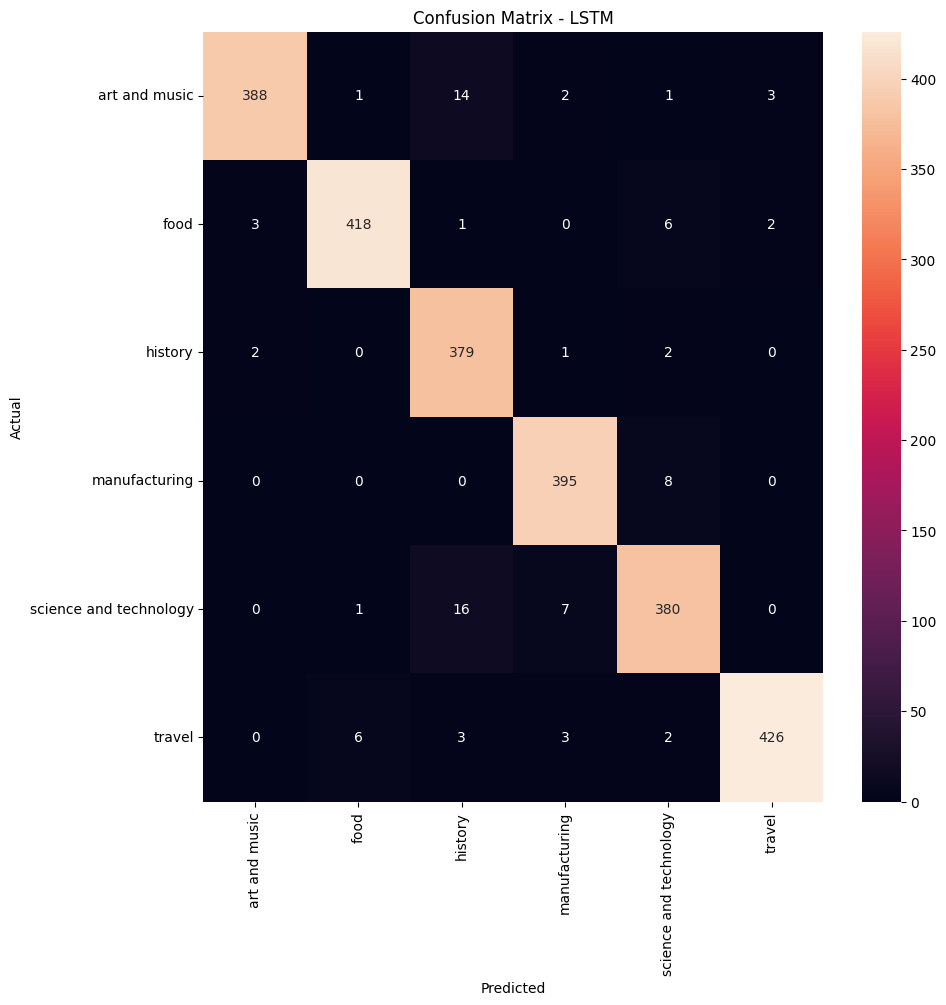

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


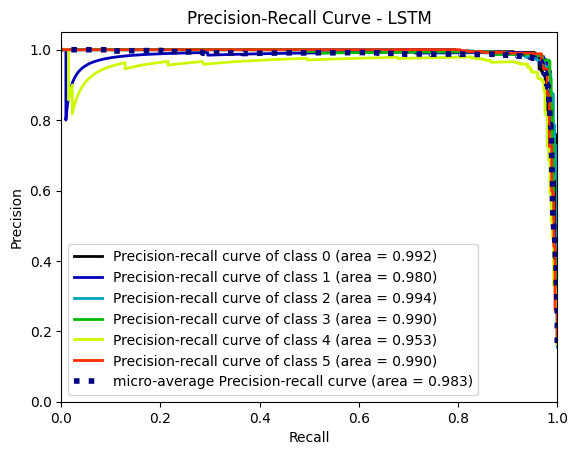

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)
y_probas = model.predict(X_test)
y_pred = np.argmax(y_probas, axis=1)
y_test = np.argmax(Y_test, axis=1)

print(metrics.classification_report(y_test, y_pred,target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - LSTM')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - LSTM')
plt.show()

In [ ]:
#import data
adata = pd.read_csv('collected_sports_data.csv' )

In [ ]:
adata.head(10)

In [ ]:
adata.drop(adata.iloc[:, 4:42], inplace = True, axis = 1)


In [ ]:
adata.head(10)

In [ ]:
# Change to lowercase
adata['Title 1'] = adata['Title 1'].map(lambda x: x.lower())
adata['Meta Description 1'] = adata['Meta Description 1'].map(lambda x: x.lower())
adata['H1-1'] = adata['H1-1'].map(lambda x: x.lower())

# Remove Punctuation
adata['Title 1'] = adata['Title 1'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
adata['Meta Description 1'] = adata['Meta Description 1'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
adata['H1-1'] = adata['H1-1'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
adata['Title 1'] = adata['Title 1'].map(lambda x: x.strip())
adata['Meta Description 1'] = adata['Meta Description 1'].map(lambda x: x.strip())
adata['H1-1'] = adata['H1-1'].map(lambda x: x.strip())


In [ ]:
adata.head(10)

In [ ]:
import pandas as pd
def find(dec,k):
    r=[]
    for i in dec.index:
        if k in dec['Meta Description 1'][i]:
            r.append(dec['Original Url'][i])
    return r


# Import Data
#adata = pd.read_csv('collected_sports_data.csv' )
adata=adata[['Original Url', 'Meta Description 1']]

#Search unigram keyword which is extracted from videos data.

result=find(adata, "science")
for i in result:
    print(" Url Link ",i)


 Url Link  https://www.adforum.com/creative-work/ad/player/19201/gatorade-sports-science-institute/gatorade
 Url Link  https://www.adforum.com/creative-work/ad/player/24345/new-version-campaign/le-monde
 Url Link  https://www.adforum.com/creative-work/ad/player/34514833/sports-homework/gatorade
 Url Link  https://www.adforum.com/creative-work/ad/player/34592518/shecanstem/ad-council
 Url Link  https://www.adforum.com/creative-work/ad/player/45183/sports-science-institute/gatorade
 Url Link  https://www.adforum.com/creative-work/ad/player/53480/better-science/callaway


In [ ]:
new_data=pd.read_csv("/content/new_data.csv")
new_data

,Title,Description
0,TRAVEL VLOG âˆ™ Welcome to Bali | PRISCILLA LEE,I had the chance to fly out to Bali with my wh...
1,GOA TRAVEL DIARY | FOUR DAYS IN GOA | TRAVEL O...,Hope you enjoy MY GOA TRAVEL DIARY this video!...
2,The Fourth Manufacturing Revolution | Geoff Tu...,Geoff Tuff's The Fourth Manufacturing Revoluti...
3,Best travel snacks for the Airplane: you don&#...,The snacks I bring onto the plane to SAVE me f...
4,Billie Eilish Freaks Out While Eating Spicy Wi...,Billie Eilish is the hyper-talented singer/son...
5,The Great Indian Kapil Show Official Trailer |...,"India ho ya Mongolia, hasi ka meter rahega hum..."
6,ATIF ASLAM + ARIJIT SINGH MASHUP 205,THE BEAUTIFUL SONGS BY TWO FAMOUS SINGERS
7,Hanuman Chalisa Super Fast | Hanuman Chalisa,"Embark on a spiritual journey of devotion, str..."
8,Deadly Indian Street Food in Chennai!! Do you ...,"When we think of south Indian food cuisine, th..."
9,Why We Travel: To Appreciate History - Rick St...,"Rick Steves, America's most respected authorit..."


In [ ]:
import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
import joblib

# Load the pre-trained AdaBoost model
loaded_model = joblib.load('adaboost_model.pkl')

# Preprocess new data
def preprocess_data(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove white spaces
    text = text.strip()
    # Tokenize into words
    tokens = word_tokenize(text)
    # Remove non-alphabetic tokens and stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # Lemmatization
    lem = WordNetLemmatizer()
    tokens = [lem.lemmatize(word, "v") for word in tokens]
    # Join tokens back into string
    text = ' '.join(tokens)
    return text

# Preprocess the new data
new_data['Title'] = new_data['Title'].apply(preprocess_data)
new_data['Description'] = new_data['Description'].apply(preprocess_data)

# Load TF-IDF vectorizers
tfidf_title = joblib.load('tfidf_title_vectorizer.pkl')
tfidf_desc = joblib.load('tfidf_desc_vectorizer.pkl')

# Transform new data into features
new_data_title_features = tfidf_title.transform(new_data['Title']).toarray()
new_data_desc_features = tfidf_desc.transform(new_data['Description']).toarray()
new_data_features = np.concatenate([new_data_title_features, new_data_desc_features], axis=1)

# Make predictions using the loaded model
predictions = loaded_model.predict(new_data_features)
probabilities = loaded_model.predict_proba(new_data_features)

# Decode the predicted categories using LabelEncoder
predicted_categories = le.inverse_transform(predictions)

# Print the predicted categories
print("Predicted Categories:")
for category in predicted_categories:
    print(category)


Predicted Categories:
travel
travel
manufacturing
travel
history
history
history
history
food
travel
travel


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np


# Save the model
model.save('lstm_model1.h5')

# Preprocess new data
def preprocess_data(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove white spaces
    text = text.strip()
    # Tokenize into words
    tokens = word_tokenize(text)
    # Remove non-alphabetic tokens and stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # Lemmatization
    lem = WordNetLemmatizer()
    tokens = [lem.lemmatize(word, "v") for word in tokens]
    # Join tokens back into string
    text = ' '.join(tokens)
    return text

# Preprocess the new data
new_data['Title'] = new_data['Title'].apply(preprocess_data)
new_data['Description'] = new_data['Description'].apply(preprocess_data)

from keras.models import load_model

# Load the trained LSTM model

lstm_model = load_model('lstm_model1.h5')

# Tokenize the new data
new_sequences = tokenizer.texts_to_sequences(new_data['Title'])

# Pad sequences to make them uniform in length
max_sequence_length = MAX_SEQUENCE_LENGTH  # Assuming you defined this earlier
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)

# Make predictions using the LSTM model
predictions = lstm_model.predict(new_padded_sequences)

# Decode the predicted categories using LabelEncoder
predicted_categories = le.inverse_transform(predictions.argmax(axis=1))

# Print the predicted categories
print("Predicted Categories:")
for category in predicted_categories:
    print(category)
